<a href="https://colab.research.google.com/github/tompollard/tableone/blob/master/tableone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demonstrating the `tableone` package

In research papers, it is common for the first table ("Table 1") to display summary statistics of the study data. The `tableone` package is used to create this table. For an introduction to basic statistical reporting in biomedical journals, we recommend reading the [SAMPL Guidelines](http://www.equator-network.org/wp-content/uploads/2013/07/SAMPL-Guidelines-6-27-13.pdf). For more reading on accurate reporting in health research, visit the [EQUATOR Network](http://www.equator-network.org/).

## Contents

Set up:

- [Suggested citation](#citation)
- [Installation](#installation)

Example usage:

- [Creating a simple Table 1](#simple-example)
- [Creating a stratified Table 1](#stratified-example)
- [Adding p-values and standardized mean differences](#pval-smd)
- [Using a custom hypothesis test to calculate P-Values](#custom-htest)

Exporting the table:

- [Exporting to LaTex, Markdown, HTML etc](#export)

## A note for users of `tableone`

While we have tried to use best practices in creating this package, automation of even basic statistical tasks can be unsound if done without supervision. We encourage use of `tableone` alongside other methods of descriptive statistics and, in particular, visualization to ensure appropriate data handling. 

It is beyond the scope of our documentation to provide detailed guidance on summary statistics, but as a primer we provide some considerations for choosing parameters when creating a summary table at: http://tableone.readthedocs.io/en/latest/bestpractice.html. 

*Guidance should be sought from a statistician when using `tableone` for a research study, especially prior to submitting the study for publication*.

## Suggested citation <a name="citation"></a>
If you use tableone in your study, please cite the following paper:

> Tom J Pollard, Alistair E W Johnson, Jesse D Raffa, Roger G Mark; *tableone*: An open source Python package for producing summary statistics for research papers, *JAMIA Open*, Volume 1, Issue 1, 1 July 2018, Pages 26–31, https://doi.org/10.1093/jamiaopen/ooy012

Download the BibTex file from: https://academic.oup.com/jamiaopen/downloadcitation/5001910?format=bibtex

## Installation <a name="installation"></a>

To install the package with pip, run the following command in your terminal: ``pip install tableone``. To install the package with Conda, run: ``conda install -c conda-forge tableone``. For more detailed installation instructions, refer to the [documentation](http://tableone.readthedocs.io/en/latest/install.html).

## Importing libraries

Before using the `tableone` package, we need to import it. We will also import `pandas` for loading our sample dataset and `matplotlib` for creating plots.

In [20]:
# Import numerical libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# Import tableone
try:
    from tableone import TableOne, load_dataset
except (ModuleNotFoundError, ImportError):
    # install on Colab
    !pip install tableone
    from tableone import TableOne, load_dataset

## Loading sample data

We begin by loading the data that we would like to summarize into a Pandas DataFrame. 
- Variables are in columns
- Encounters/observations are in rows.

In [22]:
# Load PhysioNet 2012 sample data
data = load_dataset('pn2012')

In [23]:
data.head()

,Age,SysABP,Height,Weight,ICU,MechVent,LOS,death
0,54,NaN,NaN,NaN,SICU,0,5,0
1,76,105.0,175.3,80.6,CSRU,1,8,0
2,44,148.0,NaN,56.7,MICU,0,19,0
3,68,NaN,180.3,84.6,MICU,0,9,0
4,88,NaN,NaN,NaN,MICU,0,4,0


## Example 1: Simple summary of data with Table 1 <a name="simple-example"></a>

In this example we provide summary statistics across all of the data.

In [24]:
# View the tableone docstring
TableOne??

Init signature:
TableOne(
    data: pandas.core.frame.DataFrame,
    columns: Optional[list] = None,
    categorical: Optional[list] = None,
    groupby: Optional[str] = None,
    nonnormal: Optional[list] = None,
    min_max: Optional[list] = None,
    pval: Optional[bool] = False,
    pval_adjust: Optional[str] = None,
    htest_name: bool = False,
    pval_test_name: bool = False,
    htest: Optional[dict] = None,
    isnull: Optional[bool] = None,
    missing: bool = True,
    ddof: int = 1,
    labels: Optional[dict] = None,
    rename: Optional[dict] = None,
    sort: Union[bool, str] = False,
    limit: Union[int, dict, NoneType] = None,
    order: Optional[dict] = None,
    remarks: bool = False,
    label_suffix: bool = True,
    decimals: Union[int, dict] = 1,
    smd: bool = False,
    overall: bool = True,
    row_percent: bool = False,
    display_all: bool = False,
    dip_test: bool = False,
    normal_test: bool = False,
    tukey_test: bool = False,
    pval_threshold:

In [25]:
# Create a simple Table 1 with no grouping variable
# Test for normality, multimodality (Hartigan's Dip Test), and far outliers (Tukey's test)

# for versions >= 0.7.9
table1 = TableOne(data, dip_test=True, normal_test=True, tukey_test=True)

# for versions < 0.7.9
table1 = TableOne(data)

In [26]:
# View Table 1 (note the remarks below the table)
table1

Missing       Overall
n                                       1000
Age, mean (SD)               0   65.0 (17.2)
SysABP, mean (SD)          291  114.3 (40.2)
Height, mean (SD)          475  170.1 (22.1)
Weight, mean (SD)          302   82.9 (23.8)
ICU, n (%)        CCU        0    162 (16.2)
                  CSRU            202 (20.2)
                  MICU            380 (38.0)
                  SICU            256 (25.6)
MechVent, n (%)   0          0    540 (54.0)
                  1               460 (46.0)
LOS, mean (SD)               0   14.2 (14.2)
death, n (%)      0          0    864 (86.4)
                  1               136 (13.6)

In [27]:
# The pd.DataFrame object can be accessed using the `tableone` attribute
type(table1.tableone)

pandas.core.frame.DataFrame

**Summary of the table**:
- the first row ('`n`') displays a count of the encounters/observations in the input data.
- the '`Missing`' column displays a count of the null values for the particular variable.
- if categorical variables are not defined in the arguments, they are detected automatically.
- continuous variables (e.g. '`age`') are summarized by '`mean (std)`'.
- categorical variables (e.g. '`ascites`') are summarized by '`n (% of non-null values)`'.
- if `label_suffix=True`, "mean (SD); n (%);" etc are appended to the row label.

## Exploring the warning raised by Hartigan's Dip Test

Hartigan's Dip Test is a test for multimodality. The test has suggested that the `Age`, `SysABP`, and `Height` distributions may be multimodal. We'll plot the distributions here.

(-30.0, 250.0)

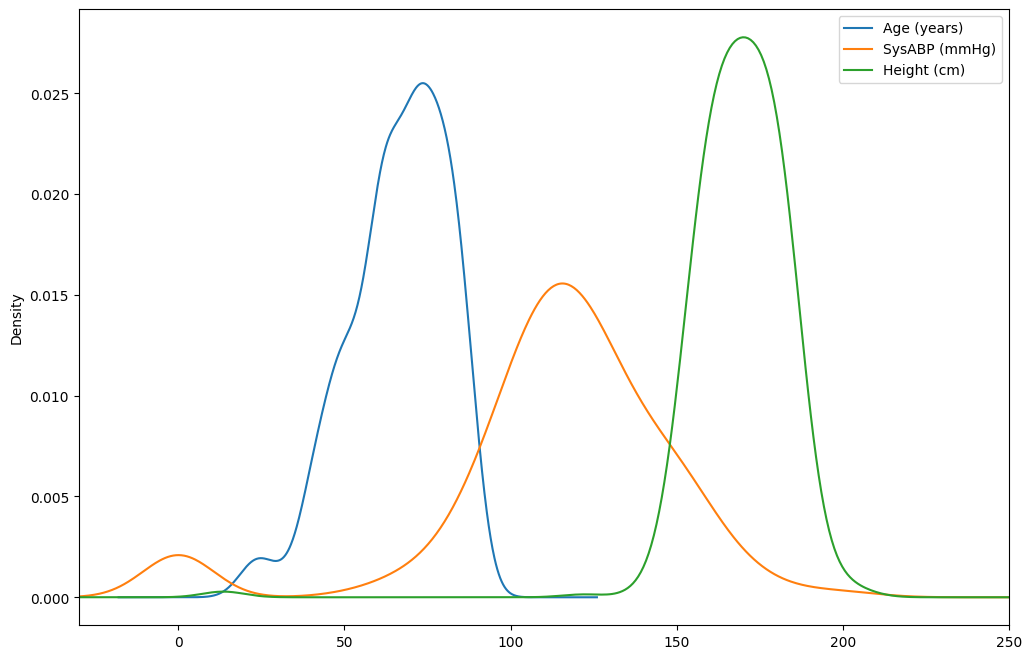

In [28]:
data[['Age','SysABP','Height']].dropna().plot.kde(figsize=[12,8])
plt.legend(['Age (years)', 'SysABP (mmHg)', 'Height (cm)'])
plt.xlim([-30,250])

## Exploring the warning raised by Tukey's rule

Tukey's rule has found far outliers in Height, so we'll look at this in a boxplot

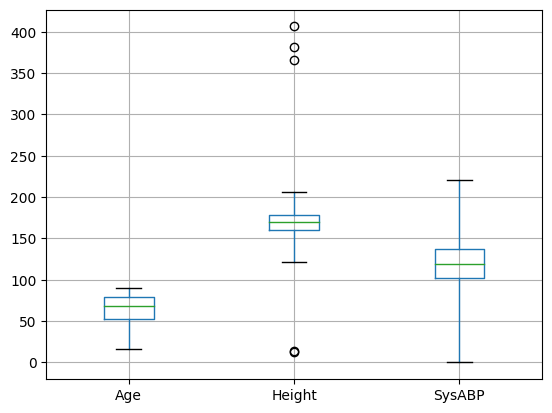

In [29]:
data[['Age','Height','SysABP']].boxplot(whis=3)
plt.show()

In both cases it seems that there are values that may need to be taken into account when calculating the summary statistics. For `SysABP`, a clearly bimodal distribution, the researcher will need to decide how to handle the peak at ~0, perhaps by cleaning the data and/or describing the issue in the summary table. For `Height`, the researcher may choose to report median, rather than mean.

## Example 2: Table 1 with stratification <a name="stratified-example"></a>

In this example we provide summary statistics across all of the data, specifying columns, categorical variables, and non-normal variables.

In [30]:
# columns to summarize
columns = ['Age', 'SysABP', 'Height', 'Weight', 'ICU', 'death']

# columns containing categorical variables
categorical = ['ICU']

# columns containing categorical variables
continuous = ['Age', 'SysABP', 'Height', 'Weight']

# non-normal variables
nonnormal = ['Age']

# limit the binary variable "death" to a single row
limit = {"death": 1}

# set the order of the categorical variables
order = {"ICU": ["MICU", "SICU", "CSRU", "CCU"]}

# alternative labels
labels={'death': 'Mortality'}

# set decimal places for age to 0
decimals = {"Age": 0}

# optionally, a categorical variable for stratification
groupby = 'death'

# rename the death column
labels={'death': 'Mortality'}

# display minimum and maximum for listed variables
min_max = ['Height']

table2 = TableOne(data, columns=columns, categorical=categorical, continuous=continuous,
                  groupby=groupby, nonnormal=nonnormal, rename=labels, label_suffix=True,
                  decimals=decimals, limit=limit, min_max=min_max)

table2

Grouped by Mortality                                                             
                                         Missing             Overall                   0                    1
n                                                               1000                 864                  136
Age, median [Q1,Q3]                            0          68 [53,79]          66 [53,78]           75 [62,83]
SysABP, mean (SD)                            291        114.3 (40.2)        115.4 (38.3)         107.6 (49.4)
Height, mean [min,max]                       475  170.1 [13.0,406.4]  170.3 [13.0,406.4]  168.5 [144.8,188.0]
Weight, mean (SD)                            302         82.9 (23.8)         83.0 (23.6)          82.3 (25.4)
ICU, n (%)             CCU                     0          162 (16.2)          137 (15.9)            25 (18.4)
                       CSRU                               202 (20.2)          194 (22.5)              8 (5.9)
                       MICU                               380 (38.0)          318 (36.8)            62 (45.6)
                       SICU                               256 (25.6)          215 (24.9)            41 (30.1)

**Summary of the table**:

- variables are explicitly defined in the input arguments.
- the variables are displayed in the same order as the `columns` argument.
- the `limit` argument specifies that only a 1 value should be shown for death.
- the order of categorical values is defined in the optional `order` argument.
- `nonnormal` continuous variables are summarized by '`median [Q1,Q3]`' instead of `mean (SD)`.
- 'sex' is shown as 'gender and 'trt' is shown as 'treatment', as specified in the `rename` argument.
- data is summarized across the groups specified in the `groupby` argument.
- `min_max` displays \[minimum, maximum\] for the variable, instead of standard deviation or upper/lower quartiles.

## Adding p-values and standardized mean differences <a name="pval-smd"></a>

- We can run a test to compute p values by setting the ``pval`` argument to True. 
- Pairwise standardized mean differences can be added with the ``smd`` argument.

In [12]:
# create grouped_table with p values
table3 = TableOne(data, columns, categorical, continuous, groupby, nonnormal, pval = True, smd=True,
                  htest_name=True)

In [13]:
# view first 10 rows of tableone
table3

Grouped by death                                                                                           
                                  Missing           Overall                 0                 1 P-Value               Test SMD (0,1)
n                                                      1000               864               136                                     
Age, median [Q1,Q3]                     0  68.0 [53.0,79.0]  66.0 [52.8,78.0]  75.0 [62.0,83.0]  <0.001     Kruskal-Wallis     0.487
SysABP, mean (SD)                     291      114.3 (40.2)      115.4 (38.3)      107.6 (49.4)   0.134  Two Sample T-test    -0.176
Height, mean (SD)                     475      170.1 (22.1)      170.3 (23.2)      168.5 (11.3)   0.304  Two Sample T-test    -0.099
Weight, mean (SD)                     302       82.9 (23.8)       83.0 (23.6)       82.3 (25.4)   0.782  Two Sample T-test    -0.031
ICU, n (%)          CCU                 0        162 (16.2)        137 (15.9)         25 (18.4)  <0.001        Chi-squared     0.490
                    CSRU                         202 (20.2)        194 (22.5)           8 (5.9)                                     
                    MICU                         380 (38.0)        318 (36.8)         62 (45.6)                                     
                    SICU                         256 (25.6)        215 (24.9)         41 (30.1)                                     
[1] Hartigan's Dip Test reports possible
                                  multimodal distributions for: Age, Height, SysABP.
[2] Normality test reports non-normal
                                  distributions for: Age, Height, SysABP, Weight.
[3] Tukey test indicates far outliers
                                  in: Height, SysABP.

**Summary of the table**:
- the `htest_name` argument can be used to display the name of the hypothesis tests used.
- the '`p-value`' column displays the p value generated to 3 decimal places.

## Using a custom hypothesis test to compute P-Values <a name="custom-htest"></a>

Custom hypothesis tests can be defined using the `htest` argument, which takes a dictionary of variable: function pairs (i.e. `htest = {var: custom_func}`, where `var` is the variable and `custom_func` is a function that takes lists of values in each group. The custom function must return a single `pval` value.

In [14]:
# load PhysioNet 2012 sample data
data = load_dataset('pn2012')

In [15]:
# define the custom tests
# `*` allows the function to take an unknown number of arguments
def my_custom_test(group1, group2):
    """
    Hypothesis test for test_self_defined_statistical_tests
    """
    my_custom_test.__name__ = "Custom test 1"
    _, pval= stats.ks_2samp(group1, group2)
    return pval


# If the number of groups is unknown, use *args
def my_custom_test2(*args):
    """
    Hypothesis test for test_self_defined_statistical_tests
    """
    # uncomment the following chunk to view the first 10 values in each group
    for n, a in enumerate(args):
        print("Group {} (total {} values.): {} ...".format(n, len(a), a[:10]))
        
    my_custom_test2.__name__ = "Custom test 2"
    _, pval= stats.ks_2samp(*args)
    return pval

custom_tests = {'Age': my_custom_test, 'SysABP': my_custom_test2}

In [16]:
# create the table
table4 = TableOne(data, groupby="death", pval=True, htest_name=True, htest=custom_tests)

Group 0 (total 608 values.): [105. 148. 150. 205.  98. 115. 119. 145.   0.  94.] ...
Group 1 (total 101 values.): [103. 139. 164. 105.  95.   0. 178. 142.  96. 105.] ...


In [17]:
table4

Grouped by death                                                                     
                                Missing       Overall             0             1 P-Value               Test
n                                                1000           864           136                           
Age, mean (SD)                        0   65.0 (17.2)   64.0 (17.4)   71.7 (14.0)  <0.001      Custom test 1
SysABP, mean (SD)                   291  114.3 (40.2)  115.4 (38.3)  107.6 (49.4)   0.012      Custom test 2
Height, mean (SD)                   475  170.1 (22.1)  170.3 (23.2)  168.5 (11.3)   0.304  Two Sample T-test
Weight, mean (SD)                   302   82.9 (23.8)   83.0 (23.6)   82.3 (25.4)   0.782  Two Sample T-test
ICU, n (%)        CCU                 0    162 (16.2)    137 (15.9)     25 (18.4)  <0.001        Chi-squared
                  CSRU                     202 (20.2)    194 (22.5)       8 (5.9)                           
                  MICU                     380 (38.0)    318 (36.8)     62 (45.6)                           
                  SICU                     256 (25.6)    215 (24.9)     41 (30.1)                           
MechVent, n (%)   0                   0    540 (54.0)    468 (54.2)     72 (52.9)   0.862        Chi-squared
                  1                        460 (46.0)    396 (45.8)     64 (47.1)                           
LOS, mean (SD)                        0   14.2 (14.2)   14.0 (13.5)   15.4 (17.7)   0.386  Two Sample T-test
[1] Hartigan's Dip Test reports possible
                                  multimodal distributions for: Age, Height, LOS, SysABP.
[2] Normality test reports non-normal
                                  distributions for: Age, Height, LOS, SysABP, Weight.
[3] Tukey test indicates far outliers
                                  in: Height, LOS, SysABP.

## Saving the table in custom formats (LaTeX, CSV, Markdown, etc) <a name="export"></a>

Tables can be exported to file in various formats, including:

- LaTeX
- CSV
- HTML

There are two options for exporting content:

1. Print and copy the table using the `tabulate` method
2. Call the relevant `to_<format>()` method on the DataFrame.

### Printing your table using tabulate

The tableone object includes a `tabulate` method, that makes use of the [tabulate](https://pypi.org/project/tabulate/) package to display the table in custom output formats. Supported table formats include: "github", "grid", "fancy_grid", "rst", "html", "latex", and "latex_raw". See the tabulate package for more formats.

To export your table in LaTex (for example, to add to your document on [Overleaf.com](https://www.overleaf.com/)), it's simple with the `tabulate` method. Just copy and paste the output below.

In [18]:
# load PhysioNet 2012 sample data
data = load_dataset('pn2012')

In [19]:
# create the table
table5 = TableOne(data, groupby="death")

In [20]:
print(table5.tabulate(tablefmt = "latex"))

\begin{tabular}{llllll}
\hline
                   &      & Missing   & Overall      & 0            & 1            \\
\hline
 n                 &      &           & 1000         & 864          & 136          \\
 Age, mean (SD)    &      & 0         & 65.0 (17.2)  & 64.0 (17.4)  & 71.7 (14.0)  \\
 SysABP, mean (SD) &      & 291       & 114.3 (40.2) & 115.4 (38.3) & 107.6 (49.4) \\
 Height, mean (SD) &      & 475       & 170.1 (22.1) & 170.3 (23.2) & 168.5 (11.3) \\
 Weight, mean (SD) &      & 302       & 82.9 (23.8)  & 83.0 (23.6)  & 82.3 (25.4)  \\
 ICU, n (\%)        & CCU  & 0         & 162 (16.2)   & 137 (15.9)   & 25 (18.4)    \\
                   & CSRU &           & 202 (20.2)   & 194 (22.5)   & 8 (5.9)      \\
                   & MICU &           & 380 (38.0)   & 318 (36.8)   & 62 (45.6)    \\
                   & SICU &           & 256 (25.6)   & 215 (24.9)   & 41 (30.1)    \\
 MechVent, n (\%)   & 0    & 0         & 540 (54.0)   & 468 (54.2)   & 72 (52.9)    \\
              

In [21]:
print(table5.tabulate(tablefmt = "github"))

|                   |      | Missing   | Overall      | 0            | 1            |
|-------------------|------|-----------|--------------|--------------|--------------|
| n                 |      |           | 1000         | 864          | 136          |
| Age, mean (SD)    |      | 0         | 65.0 (17.2)  | 64.0 (17.4)  | 71.7 (14.0)  |
| SysABP, mean (SD) |      | 291       | 114.3 (40.2) | 115.4 (38.3) | 107.6 (49.4) |
| Height, mean (SD) |      | 475       | 170.1 (22.1) | 170.3 (23.2) | 168.5 (11.3) |
| Weight, mean (SD) |      | 302       | 82.9 (23.8)  | 83.0 (23.6)  | 82.3 (25.4)  |
| ICU, n (%)        | CCU  | 0         | 162 (16.2)   | 137 (15.9)   | 25 (18.4)    |
|                   | CSRU |           | 202 (20.2)   | 194 (22.5)   | 8 (5.9)      |
|                   | MICU |           | 380 (38.0)   | 318 (36.8)   | 62 (45.6)    |
|                   | SICU |           | 256 (25.6)   | 215 (24.9)   | 41 (30.1)    |
| MechVent, n (%)   | 0    | 0         | 540 (54.0)   

### Exporting your table using the `to_<format>()` method

Alternatively, the table can be saved to file using the Pandas `to_format()` method. 

In [22]:
# Save to Excel
fn1 = 'tableone.xlsx'
table5.to_excel(fn1)

# Save table to LaTeX
fn2 = 'tableone.tex'
table5.to_latex(fn2)

# Save table to HTML
fn3 = 'tableone.html'
table5.to_html(fn3)